In [1]:
# Importiamo il modulo per l'uso degli alberi di decisione

In [2]:
from sklearn import tree

In [3]:
# Definiamo la matrice contenente gli esempi

In [4]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]

In [5]:
# Definiamo la lista contenente le etichette corrette

In [6]:
Y = [1, 0, 0, 0, 1, 1]

In [7]:
# Creiamo un albero di decisione e gli passiamo il training set

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [9]:
# Proviamo a classificare qualche istanza

In [10]:
print(clf.predict([[0, 1, 1]]))

[0]


In [11]:
print(clf.predict([[1, 0, 1], [0, 0, 1]]))

[1 0]


In [12]:
# Mostriamo graficamente la struttura dell'albero di decisione utilizzato

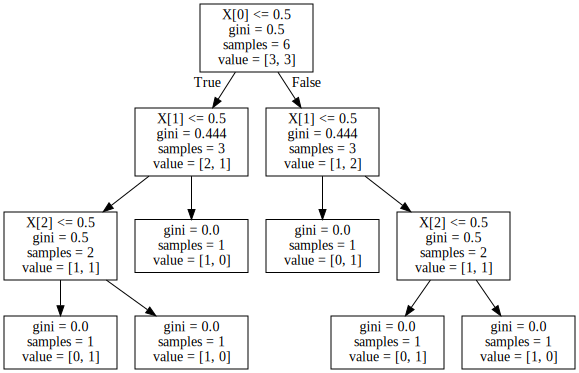

In [13]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [14]:
# Utilizziamo un training set noto

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

In [16]:
# Creiamo un nuovo albero di decisione con le seguenti caratteristiche:
#  - Scelta dello split sulla base dell'entropia
#  - Scelta del seed per la suddivisione del data set
#  - Numero minimo di 5 esempi per foglia (per ridurre l'overfitting)
#  - Particolari pesi per classe

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0:1,1:1,2:1})

In [18]:
# Divisione del data set in training set e test set

In [19]:
import numpy as np
import time
np.random.seed(int(time.time()))

# Mescoliamo i dati in maniera casuale
indices = np.random.permutation(len(iris.data))

# Gli ultimi 10 indici per il test set, gli altri per il training set
indices_training = indices[:-10]
indices_test = indices[-10:]

# Creazione dei due set
iris_X_train = iris.data[indices_training]
iris_Y_train = iris.target[indices_training]
iris_X_test = iris.data[indices_test]
iris_Y_test = iris.target[indices_test]

In [20]:
clf = clf.fit(iris_X_train, iris_Y_train)

In [21]:
predicted_Y_test = clf.predict(iris_X_test)

In [22]:
print(f"Predictions: {predicted_Y_test}")
print(f"True classes: {iris_Y_test}")
print(iris.target_names)

Predictions: [2 2 1 2 2 2 2 2 0 1]
True classes: [2 2 1 2 2 2 2 2 0 1]
['setosa' 'versicolor' 'virginica']


In [23]:
for i in range(len(iris_Y_test)):
    print(f"Instance #{indices_test[i]}:")
    print(f"Predicted: {iris.target_names[predicted_Y_test[i]]}\tTrue: {iris.target_names[iris_Y_test[i]]}")

Instance #109:
Predicted: virginica	True: virginica
Instance #148:
Predicted: virginica	True: virginica
Instance #85:
Predicted: versicolor	True: versicolor
Instance #113:
Predicted: virginica	True: virginica
Instance #141:
Predicted: virginica	True: virginica
Instance #139:
Predicted: virginica	True: virginica
Instance #114:
Predicted: virginica	True: virginica
Instance #115:
Predicted: virginica	True: virginica
Instance #13:
Predicted: setosa	True: setosa
Instance #88:
Predicted: versicolor	True: versicolor


In [24]:
# Facciamo cross-validation

In [25]:
from sklearn.model_selection import cross_val_score

# Calcoliamo l'accuratezza facendo crosso validation con un fattore di fold pari a 5
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.86666667, 0.86666667, 1.        ])

In [26]:
# Rappresentiamo graficamente l'albero di decisione

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Esercizi

Accuracy: 0.8933333333333333


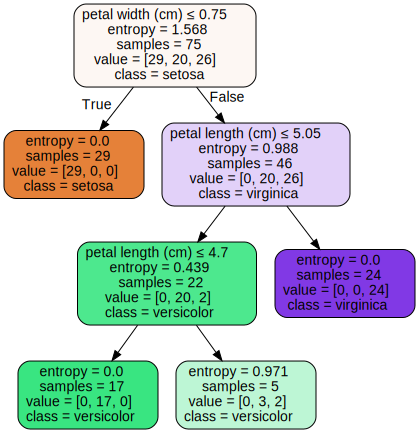

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, train_size=0.5, random_state=0)

clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, random_state=0)
clf = clf.fit(X_train, y_train)
y_predicted_fst = clf.predict(X_test)

print(f"Accuracy: {len(y_predicted_fst[y_predicted_fst == y_test]) / len(y_test)}")

dot_data_fst = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph_fst = graphviz.Source(dot_data_fst)
graph_fst

Accuracy: 0.9466666666666667


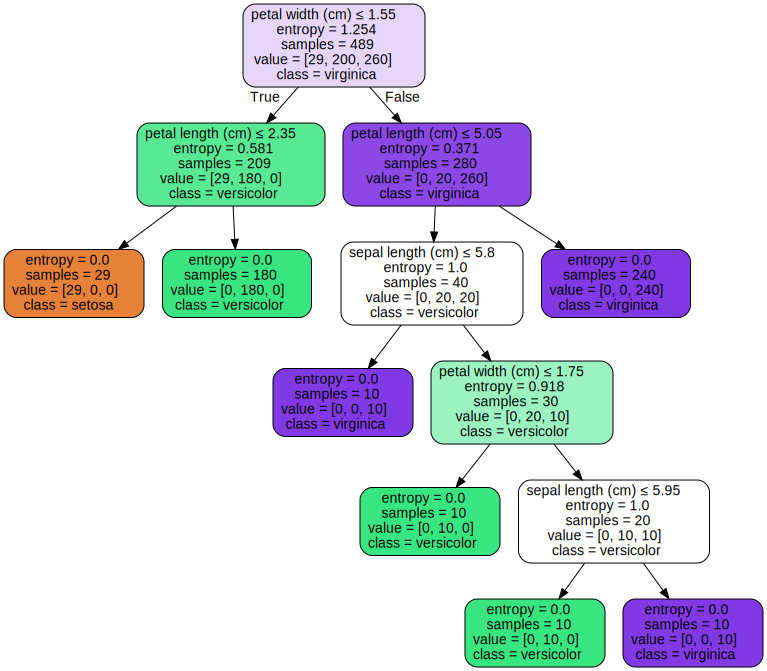

In [30]:
inflate = lambda t, a: np.repeat(t, a, axis=0)

inflated_X_versicolor = inflate(X_train[y_train == 1], 10)
inflated_y_versicolor = inflate(y_train[y_train == 1], 10)
inflated_X_virginica = inflate(X_train[y_train == 2], 10)
inflated_y_virginica = inflate(y_train[y_train == 2], 10)

inflated_X_train = np.concatenate([X_train[y_train == 0], inflated_X_versicolor, inflated_X_virginica])
inflated_y_train = np.concatenate([y_train[y_train == 0], inflated_y_versicolor, inflated_y_virginica])

inflated_clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, random_state=0)
inflated_clf = inflated_clf.fit(inflated_X_train, inflated_y_train)
y_predicted_snd = inflated_clf.predict(X_test)
print(f"Accuracy: {len(y_predicted_snd[y_predicted_snd == y_test]) / len(y_test)}")

dot_data_snd = tree.export_graphviz(inflated_clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph_snd = graphviz.Source(dot_data_snd)
graph_snd

Accuracy: 0.92


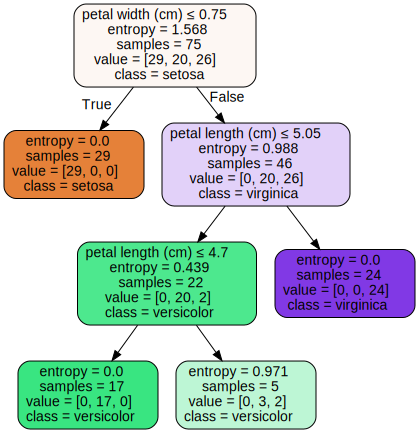

In [31]:
weighted_clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, random_state=0, class_weight={0: 1, 1: 10, 2: 10})
# weighted_clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, random_state=0)

weighted_clf = weighted_clf.fit(X_train, y_train)
y_predicted_trd = weighted_clf.predict(X_test)

# weights = np.where(y_test == 0, 1, 10)
# print(weighted_clf.score(X_test, y_test, weights))
print(f"Accuracy: {len(y_predicted_trd[y_predicted_trd == y_test]) / len(y_test)}")

dot_data_trd = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph_trd = graphviz.Source(dot_data_trd)
graph_trd

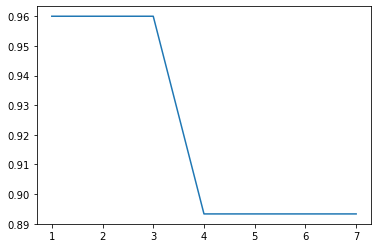

Best value for min_samples_leaf: 1


In [32]:
values = []
best_i = 1
best_acc = 0.

for i in range(1, 8):
    clf_test = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i, random_state=0)
    clf_test = clf_test.fit(X_train, y_train)
    y_predicted_test = clf_test.predict(X_test)
    acc = len(y_predicted_test[y_predicted_test == y_test]) / len(y_test)
    values.append((i, acc))
    
    if acc > best_acc:
        best_acc = acc
        best_i = i

    # print(f"Accuracy: {acc}")

indexes, accs = list(zip(*values))
plt.plot(indexes, accs)
plt.show()

print(f"Best value for min_samples_leaf: {best_i}")

In [33]:
def get_stats(positive_class, y_test, y_predicted):
    tp, fp, tn, fn = [0, 0, 0, 0]

    for i, e in enumerate(y_test):
        if e == positive_class and y_predicted[i] == positive_class:
            tp += 1
        elif e != positive_class and y_predicted[i] == positive_class:
            fp += 1
        elif e != positive_class and y_predicted[i] != positive_class:
            tn += 1
        elif e == positive_class and y_predicted[i] != positive_class:
            fn += 1

    return (tp, fp, tn, fn)

# tp_setosa, fp_setosa, tn_setosa, fn_setosa = get_stats(0, y_test, y_predicted_fst)
# tp_versicolor, fp_versicolor, tn_versicolor, fn_versicolor = get_stats(1, y_test, y_predicted_fst)
# tp_virginica, fp_virginica, tn_virginica, fn_virginica = get_stats(2, y_test, y_predicted_fst)

tp_setosa, fp_setosa, tn_setosa, fn_setosa = get_stats(0, y_test, y_predicted_fst)
tp_versicolor, fp_versicolor, tn_versicolor, fn_versicolor = get_stats(1, y_test, y_predicted_fst)
tp_virginica, fp_virginica, tn_virginica, fn_virginica = get_stats(2, y_test, y_predicted_fst)

# tp_setosa, fp_setosa, tn_setosa, fn_setosa = get_stats(0, y_test, y_predicted_trd)
# tp_versicolor, fp_versicolor, tn_versicolor, fn_versicolor = get_stats(1, y_test, y_predicted_trd)
# tp_virginica, fp_virginica, tn_virginica, fn_virginica = get_stats(2, y_test, y_predicted_trd)

tpr_setosa = tp_setosa / (tp_setosa + fn_setosa)
fpr_setosa = fp_setosa / (fp_setosa + tn_setosa)

tpr_versicolor = tp_versicolor / (tp_versicolor + fn_versicolor)
fpr_versicolor = fp_versicolor / (fp_versicolor + tn_versicolor)

tpr_virginica = tp_virginica / (tp_virginica + fn_virginica)
fpr_virginica = fp_virginica / (fp_virginica + tn_virginica)

print("Setosa:")
print(f"TP: {tp_setosa}, FP: {fp_setosa}, TN: {tn_setosa}, FN: {fn_setosa}")
print(f"TPR: {tpr_setosa}, FPR: {fpr_setosa}")
print("\nVersicolor:")
print(f"TP: {tp_versicolor}, FP: {fp_versicolor}, TN: {tn_versicolor}, FN: {fn_versicolor}")
print(f"TPR: {tpr_versicolor}, FPR: {fpr_versicolor}")
print("\nVirginica:")
print(f"TP: {tp_virginica}, FP: {fp_virginica}, TN: {tn_virginica}, FN: {fn_virginica}")
print(f"TPR: {tpr_virginica}, FPR: {fpr_virginica}")

# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.plot([0, 1, fpr_versicolor], [0, 1, tpr_versicolor], "--")
# plt.scatter([fpr_setosa, fpr_versicolor, fpr_virginica], [tpr_setosa, tpr_versicolor, tpr_virginica])
# plt.show()

Setosa:
TP: 21, FP: 0, TN: 54, FN: 0
TPR: 1.0, FPR: 0.0

Versicolor:
TP: 29, FP: 7, TN: 38, FN: 1
TPR: 0.9666666666666667, FPR: 0.15555555555555556

Virginica:
TP: 17, FP: 1, TN: 50, FN: 7
TPR: 0.7083333333333334, FPR: 0.0196078431372549


Primo caso:


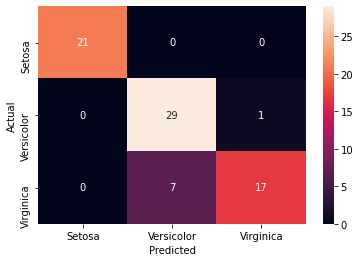

Secondo caso:


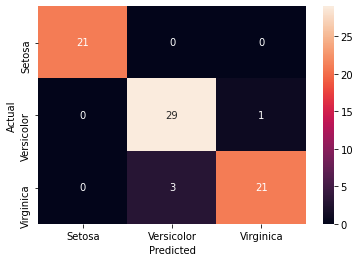

Terzo caso:


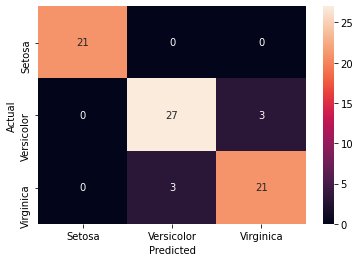

In [34]:
labels = [e.capitalize() for e in iris_dataset.target_names]

def plot_confusion_matrix(y_test, y_predicted):
    data = {"y_test": y_test, "y_predicted": y_predicted}
    df = pd.DataFrame(data, columns=["y_test", "y_predicted"])
    confusion_matrix = pd.crosstab(df["y_test"], df["y_predicted"], rownames=["Actual"], colnames=["Predicted"])
    sn.heatmap(confusion_matrix, annot=True, xticklabels=labels, yticklabels=labels)
    plt.show()

print("Primo caso:")
plot_confusion_matrix(y_test, y_predicted_fst)
print("Secondo caso:")
plot_confusion_matrix(y_test, y_predicted_snd)
print("Terzo caso:")
plot_confusion_matrix(y_test, y_predicted_trd)

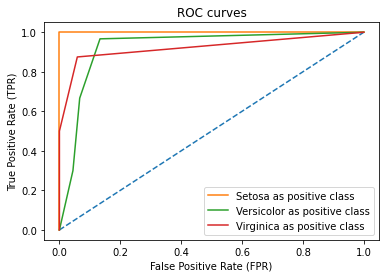

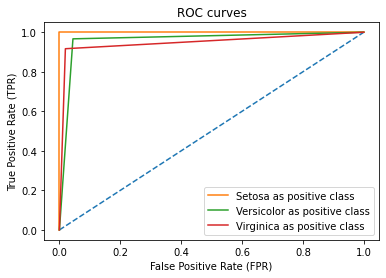

In [35]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

binarized_test = label_binarize(y_test, classes=[0,1,2])
bin_setosa_test = binarized_test[:,0]
bin_versicolor_test = binarized_test[:,1]
bin_virginica_test = binarized_test[:,2]

binarized_train = label_binarize(y_train, classes=[0, 1, 2])
bin_setosa_train = binarized_train[:,0]
bin_versicolor_train = binarized_train[:,1]
bin_virginica_train = binarized_train[:,2]

binarized_train_inflated = label_binarize(inflated_y_train, classes=[0, 1, 2])
bin_setosa_train_inflated = binarized_train_inflated[:,0]
bin_versicolor_train_inflated = binarized_train_inflated[:,1]
bin_virginica_train_inflated = binarized_train_inflated[:,2]

def plot_roc_curve(clf, X_train, binarized_trains, binarized_tests, labels):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot([0, 1], [0, 1], "--")

    for binarized_train, binarized_test, label in zip(binarized_trains, binarized_tests, labels):
        clf = clf.fit(X_train, binarized_train)
        fpr, tpr, thresholds = roc_curve(binarized_test, clf.predict_proba(X_test)[:,1])
        ax.plot(fpr, tpr, label=f"{label} as positive class")

    # plt.xlim([-0.01, 1])
    # plt.ylim([0, 1.01])
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.set_title("ROC curves")
    plt.legend()
    plt.show()

plot_roc_curve(clf, X_train, [bin_setosa_train, bin_versicolor_train, bin_virginica_train], [bin_setosa_test, bin_versicolor_test, bin_virginica_test], labels)
plot_roc_curve(inflated_clf, inflated_X_train, [bin_setosa_train_inflated, bin_versicolor_train_inflated, bin_virginica_train_inflated], [bin_setosa_test, bin_versicolor_test, bin_virginica_test], labels)